In [ ]:
"""
Module contains the Advanced Data Visualization with Pandas and Matplotlib
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import Normalizer

**Task 4: Advanced Data Visualization with Pandas and Matplotlib**
Description: You are provided with a complex dataset that requires advanced data manipulation and visualization techniques. Accomplish the following tasks:

Load the dataset into a pandas DataFrame.
Perform data preprocessing tasks, such as handling missing values, encoding categorical variables, and feature scaling.
Utilize pandas to create a pivot table for summarizing the data.
Generate a box plot to compare the distributions of multiple variables across different categories.
Create a stacked area chart to visualize the composition of different variables over time.
Develop a heat map to display the correlation matrix of the numerical variables.
Combine multiple visualizations into a dashboard-like layout using Matplotlib's subplots.
Save the final visualization dashboard as a PDF document.


**Load the dataset into a pandas DataFrame**

In [ ]:
country_vac_df = pd.read_csv('sample_data/country_vaccinations.csv', sep=",", encoding='Latin-1')
country_vac_df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [ ]:
country_vac_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              86512 non-null  object 
 1   iso_code                             86512 non-null  object 
 2   date                                 86512 non-null  object 
 3   total_vaccinations                   43607 non-null  float64
 4   people_vaccinated                    41294 non-null  float64
 5   people_fully_vaccinated              38802 non-null  float64
 6   daily_vaccinations_raw               35362 non-null  float64
 7   daily_vaccinations                   86213 non-null  float64
 8   total_vaccinations_per_hundred       43607 non-null  float64
 9   people_vaccinated_per_hundred        41294 non-null  float64
 10  people_fully_vaccinated_per_hundred  38802 non-null  float64
 11  daily_vaccinations_per_milli

In [ ]:
country_vac_df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,7.614000e+03,6.941000e+03,6.639000e+03,6.123000e+03,1.622300e+04,7614.000000,6941.000000,6639.000000,16223.000000
mean,1.157751e+08,1.634798e+07,1.549596e+07,6.675333e+05,2.691492e+05,83.190293,42.872144,36.451152,3303.500894
std,4.653194e+08,6.817106e+07,8.091043e+07,2.454596e+06,1.522186e+06,68.388005,30.086932,28.937057,4355.125650
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,3.140662e+05,1.723930e+05,1.488490e+05,5.208500e+03,6.040000e+02,18.732500,12.880000,7.800000,674.000000
50%,3.556869e+06,1.877840e+06,1.309135e+06,3.953600e+04,5.672000e+03,68.145000,43.770000,32.190000,2099.000000
75%,2.792613e+07,1.345631e+07,9.113942e+06,1.894345e+05,4.217250e+04,141.310000,71.880000,65.365000,4741.000000
max,3.263129e+09,1.275541e+09,1.240777e+09,2.474100e+07,2.242429e+07,261.820000,92.960000,91.710000,117497.000000


**Perform data preprocessing tasks, such as handling missing values, encoding categorical variables, and feature scaling**

In [ ]:
country_vac_df.isna().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     42905
people_vaccinated                      45218
people_fully_vaccinated                47710
daily_vaccinations_raw                 51150
daily_vaccinations                       299
total_vaccinations_per_hundred         42905
people_vaccinated_per_hundred          45218
people_fully_vaccinated_per_hundred    47710
daily_vaccinations_per_million           299
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [ ]:
country_vac_df.isnull()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,False,False,False,False,False,True,True,True,False,False,True,True,False,False,False
1,False,False,False,True,True,True,True,False,True,True,True,False,False,False,False
2,False,False,False,True,True,True,True,False,True,True,True,False,False,False,False
3,False,False,False,True,True,True,True,False,True,True,True,False,False,False,False
4,False,False,False,True,True,True,True,False,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86507,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
86508,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
86509,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
86510,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

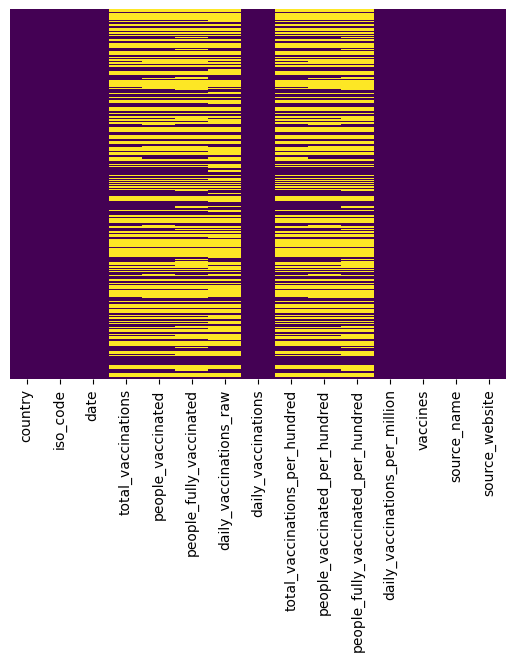

In [ ]:
# Represents the column with null values
sns.heatmap(country_vac_df.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [ ]:
country_vac_df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Faeroe Isl

<Axes: xlabel='country', ylabel='count'>

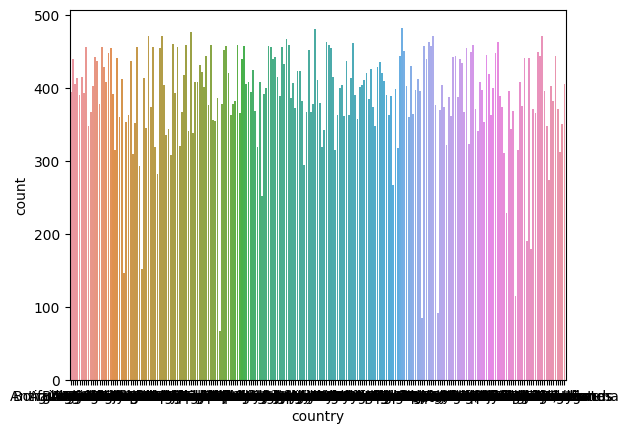

In [ ]:
# represents country categorical variable
sns.countplot(x = 'country', data = country_vac_df)

In [ ]:
country_vac_df["source_name"].unique()

array(['World Health Organization', 'Ministry of Health',
       'Government of Aruba', 'Government of Australia via CovidBaseAU',
       'Government of Azerbaijan', 'Pan American Health Organization',
       'Directorate General of Health Services', 'Sciensano',
       'Ministry of Health via https://www.boligrafica.com/',
       'Africa Centres for Disease Control and Prevention',
       'State governments via coronavirusbra1.github.io',
       'Official data from provinces via covid19tracker.ca',
       'Ministry of Health, via Ministry of Science GitHub repository',
       'National Health Commission', 'SPC Public Health Division',
       'Costa Rican Social Security Fund', 'Government of Curacao',
       'Statens Serum Institute', 'Ministry of Public Health',
       'Government of Ecuador via Ecuacovid',
       'Government of the United Kingdom', 'National Health Board',
       'Government of the Faeroe Islands',
       'Government of the Falkland Islands',
       'Finnish Institu

<Axes: xlabel='source_name', ylabel='count'>

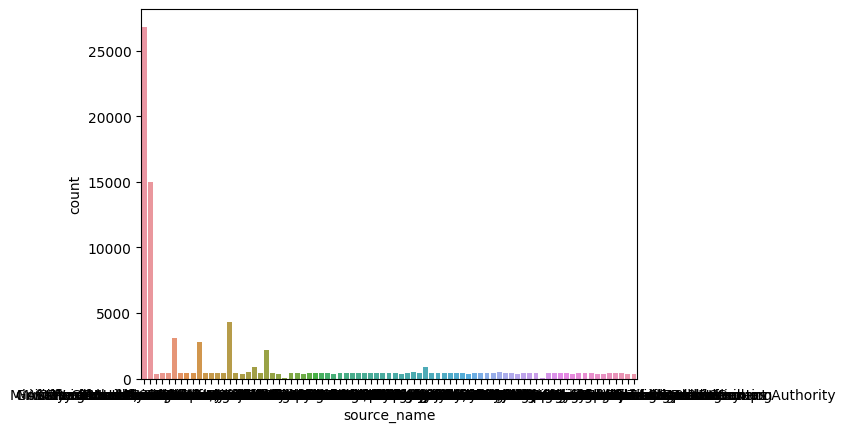

In [ ]:
sns.countplot(x = 'source_name', data = country_vac_df)

<Axes: xlabel='country', ylabel='people_vaccinated'>

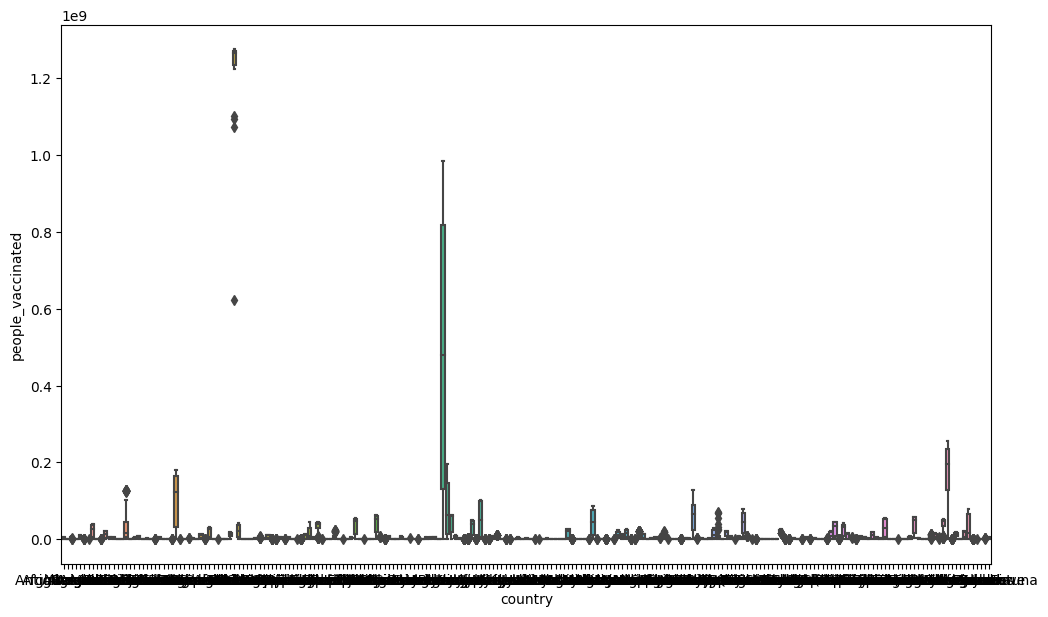

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x = 'country',y = 'people_vaccinated', data = country_vac_df)

In [ ]:
country_vac_df.fillna(0, inplace = True)
country_vac_df['iso_code'].fillna('GBR', inplace=True)
country_vac_df.drop(country_vac_df.index[country_vac_df['iso_code'] == 0], inplace = True)

In [ ]:
country_count_df = country_vac_df.groupby(by=['country'], as_index=False)['people_vaccinated'].count()
country_count_df

,country,people_vaccinated
0,Afghanistan,394
1,Albania,439
2,Algeria,405
3,Andorra,413
4,Angola,390
...,...,...
218,Wales,443
219,Wallis and Futuna,371
220,Yemen,312
221,Zambia,350


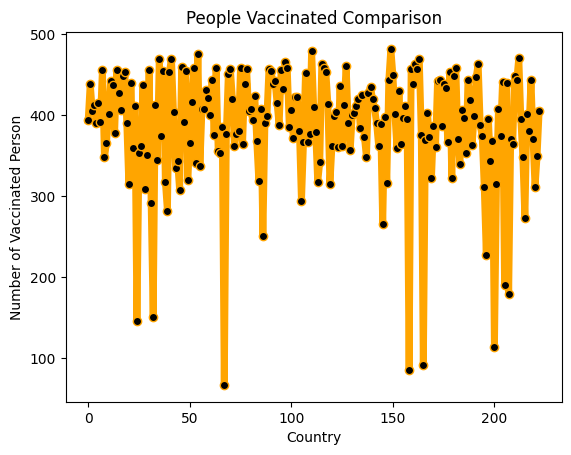

In [ ]:
from matplotlib.markers import MarkerStyle
# Line chart folder size visualization
plt.plot(country_count_df['people_vaccinated'], linewidth = '5', mfc = 'black', marker = 'o', color = 'orange')
plt.title("People Vaccinated Comparison")
plt.xlabel("Country")
plt.ylabel("Number of Vaccinated Person")
plt.show()

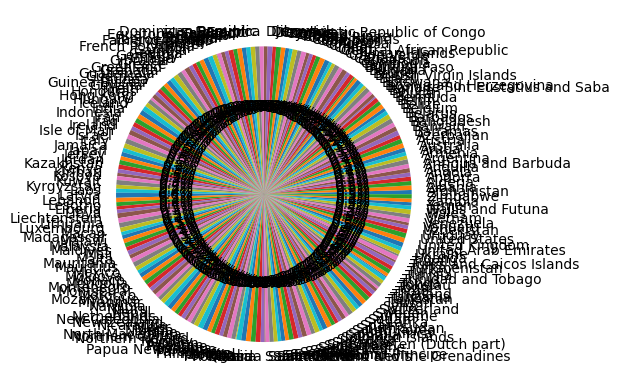

In [ ]:
fig, ax = plt.subplots()
ax.pie(country_count_df['people_vaccinated'], labels = country_count_df["country"], autopct='%1.1f%%')
plt.show()

In [ ]:
country_vac_df.mean()

<ipython-input-59-48c271973abb>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  country_vac_df.mean()


total_vaccinations                     2.315117e+07
people_vaccinated                      8.451007e+06
people_fully_vaccinated                6.341251e+06
daily_vaccinations_raw                 1.106083e+05
daily_vaccinations                     1.308517e+05
total_vaccinations_per_hundred         4.041962e+01
people_vaccinated_per_hundred          1.953547e+01
people_fully_vaccinated_per_hundred    1.593274e+01
daily_vaccinations_per_million         3.245792e+03
dtype: float64

In [ ]:
# Fill all dat set with NA with zero and Iso_code na with GBR and drop all column of ISo_code with Zero
country_vac_df.fillna(0, inplace = True)
country_vac_df['iso_code'].fillna('GBR', inplace=True)
country_vac_df.drop(country_vac_df.index[country_vac_df['iso_code'] == 0], inplace = True)

In [ ]:
country_vac_df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86507,Zimbabwe,ZWE,2022-03-25,8691642.0,4814582.0,3473523.0,139213.0,69579.0,57.59,31.90,23.02,4610.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86508,Zimbabwe,ZWE,2022-03-26,8791728.0,4886242.0,3487962.0,100086.0,83429.0,58.25,32.38,23.11,5528.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86509,Zimbabwe,ZWE,2022-03-27,8845039.0,4918147.0,3493763.0,53311.0,90629.0,58.61,32.59,23.15,6005.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86510,Zimbabwe,ZWE,2022-03-28,8934360.0,4975433.0,3501493.0,89321.0,100614.0,59.20,32.97,23.20,6667.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


In [ ]:
# Drop unnecessary columns from dataframe
country_vac_df.drop(["source_website","daily_vaccinations_raw",
                     "people_fully_vaccinated_per_hundred","daily_vaccinations_per_million",
                     "people_vaccinated_per_hundred" , "total_vaccinations_per_hundred"],axis=1, inplace=True)

In [ ]:
country_vac_df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,vaccines,source_name
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization
...,...,...,...,...,...,...,...,...,...
86507,Zimbabwe,ZWE,2022-03-25,8691642.0,4814582.0,3473523.0,69579.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health
86508,Zimbabwe,ZWE,2022-03-26,8791728.0,4886242.0,3487962.0,83429.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health
86509,Zimbabwe,ZWE,2022-03-27,8845039.0,4918147.0,3493763.0,90629.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health
86510,Zimbabwe,ZWE,2022-03-28,8934360.0,4975433.0,3501493.0,100614.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health


<Axes: >

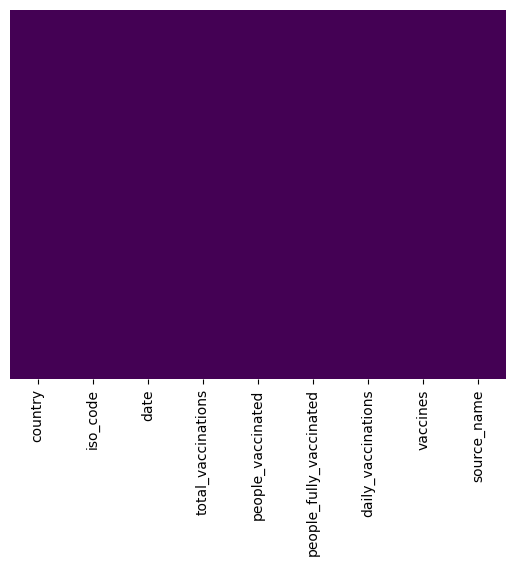

In [ ]:
# Total clean data with useful column
sns.heatmap(country_vac_df.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

**Note**
There is no encoding categorical variables in our data frame now

**Feature Scaling**
Feature scaling is the process of normalizing the range of features in a dataset.

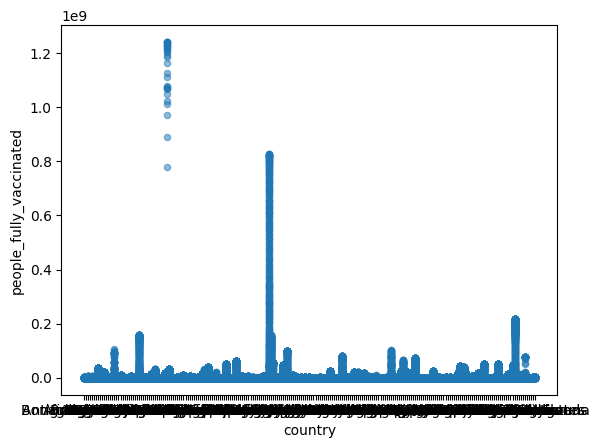

In [ ]:
country_vac_df.plot.scatter(x="country", y="people_fully_vaccinated", alpha=0.5)
plt.show()

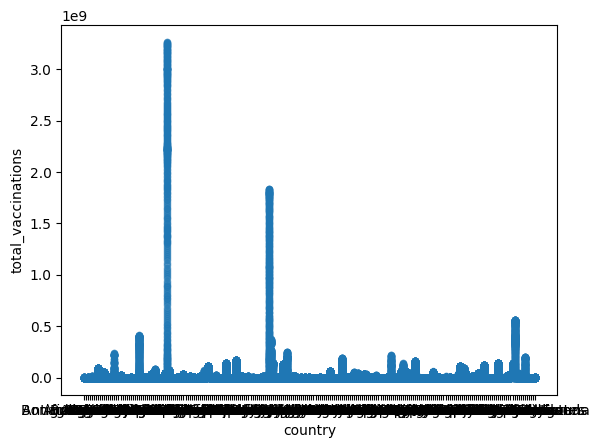

In [ ]:
country_vac_df.plot.scatter(x="country", y="total_vaccinations", alpha=0.5)
plt.show()

**Normalizing the data**

In [ ]:
# data_normalizer = Normalizer()
# scaled_data = data_normalizer.fit_transform(country_vac_df)
# scaled_df = pd.DataFrame(scaled_data,
#                          columns=country_vac_df.columns)


**Utilize pandas to create a pivot table for summarizing the data.**

In [ ]:
# applying pivot to make summarize table
# country	iso_code	date	total_vaccinations	people_vaccinated	people_fully_vaccinated	daily_vaccinations


reshaped_summarized_df = pd.pivot(country_vac_df, index='date', columns='country',
                                  values=["total_vaccinations",
                                          "people_fully_vaccinated", "daily_vaccinations"])
reshaped_summarized_df.fillna(0, inplace = True)

In [ ]:
reshaped_summarized_df

total_vaccinations                                               \
country           Afghanistan Albania Algeria Andorra      Angola Anguilla   
date                                                                         
2020-12-02                0.0     0.0     0.0     0.0         0.0      0.0   
2020-12-03                0.0     0.0     0.0     0.0         0.0      0.0   
2020-12-04                0.0     0.0     0.0     0.0         0.0      0.0   
2020-12-05                0.0     0.0     0.0     0.0         0.0      0.0   
2020-12-06                0.0     0.0     0.0     0.0         0.0      0.0   
...                       ...     ...     ...     ...         ...      ...   
2022-03-25                0.0     0.0     0.0     0.0  17535411.0  22714.0   
2022-03-26                0.0     0.0     0.0     0.0         0.0      0.0   
2022-03-27                0.0     0.0     0.0     0.0         0.0      0.0   
2022-03-28                0.0     0.0     0.0     0.0         0.0      0.0   
2022-03-29                0.0     0.0     0.0     0.0         0.0      0.0   

                                                              ...  \
country    Antigua and Barbuda   Argentina Armenia     Aruba  ...   
date                                                          ...   
2020-12-02                 0.0         0.0     0.0       0.0  ...   
2020-12-03                 0.0         0.0     0.0       0.0  ...   
2020-12-04                 0.0         0.0     0.0       0.0  ...   
2020-12-05                 0.0         0.0     0.0       0.0  ...   
2020-12-06                 0.0         0.0     0.0       0.0  ...   
...                        ...         ...     ...       ...  ...   
2022-03-25                 0.0  96355507.0     0.0  169010.0  ...   
2022-03-26                 0.0  96402680.0     0.0  169017.0  ...   
2022-03-27                 0.0  96423008.0     0.0       0.0  ...   
2022-03-28                 0.0  96504666.0     0.0  169131.0  ...   
2022-03-29                 0.0  96504666.0     0.0  169231.0  ...   

           daily_vaccinations                                               \
country               Uruguay Uzbekistan Vanuatu Venezuela Vietnam   Wales   
date                                                                         
2020-12-02                0.0        0.0     0.0       0.0     0.0     0.0   
2020-12-03                0.0        0.0     0.0       0.0     0.0     0.0   
2020-12-04                0.0        0.0     0.0       0.0     0.0     0.0   
2020-12-05                0.0        0.0     0.0       0.0     0.0     0.0   
2020-12-06                0.0        0.0     0.0       0.0     0.0     0.0   
...                       ...        ...     ...       ...     ...     ...   
2022-03-25            11936.0        0.0     0.0       0.0     0.0  1667.0   
2022-03-26            11911.0        0.0     0.0       0.0     0.0  1519.0   
2022-03-27            11909.0        0.0     0.0       0.0     0.0  1505.0   
2022-03-28            10421.0        0.0     0.0       0.0     0.0  1609.0   
2022-03-29            10097.0        0.0     0.0       0.0     0.0     0.0   

                                                       
country    Wallis and Futuna Yemen   Zambia  Zimbabwe  
date                                                   
2020-12-02               0.0   0.0      0.0       0.0  
2020-12-03               0.0   0.0      0.0       0.0  
2020-12-04               0.0   0.0      0.0       0.0  
2020-12-05               0.0   0.0      0.0       0.0  
2020-12-06               0.0   0.0      0.0       0.0  
...                      ...   ...      ...       ...  
2022-03-25              13.0   0.0  17037.0   69579.0  
2022-03-26              15.0   0.0  14375.0   83429.0  
2022-03-27              17.0   0.0  14473.0   90629.0  
2022-03-28              19.0   0.0  14571.0  100614.0  
2022-03-29               0.0   0.0  13650.0  103751.0  

[483 rows x 669 columns]

In [ ]:
# # ax = reshaped_summarized_df.plot.bar(x='date', stacked=True, color=['tomato','lightseagreen'], figsize=(8,6))
# ax.set_title('The Number of Students', fontsize=20)
# ax.set_ylim(0,500)
# ax.set_xticklabels(['A','B','C'], rotation=0)

**Generate a box plot to compare the distributions of multiple variables across different categories**

In [ ]:
# country_vac_df["iso_code"].unique()

In [ ]:
# money_spent = country_vac_df.groupby(by=['iso_code'], as_index=False)['daily_vaccinations'].sum()
# money_spent

In [ ]:
source_per_ins = country_vac_df.groupby(by=['source_name'], as_index=False)['vaccines'].count()
source_per_ins

,source_name,vaccines
0,Africa Centres for Disease Control and Prevention,2780
1,COVID-19 Malta Public Health Response Team,436
2,COVID-19 Vaccine Information Platform,441
3,Centers for Disease Control and Prevention,471
4,Costa Rican Social Security Fund,460
...,...,...
76,Secretary of Health,461
77,State governments via coronavirusbra1.github.io,437
78,Statens Serum Institute,476
79,Taiwan Centers for Disease Control,374


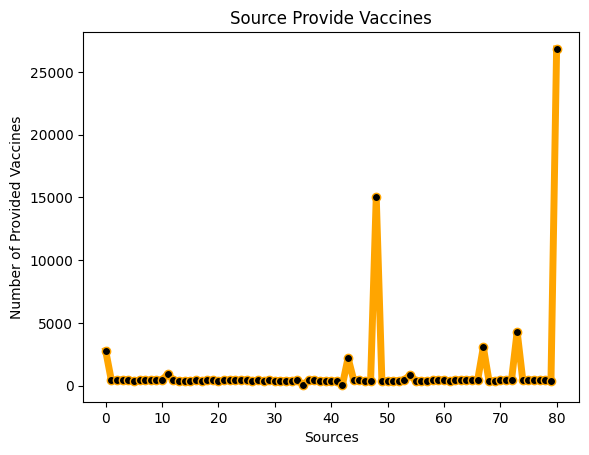

In [ ]:
from matplotlib.markers import MarkerStyle
# Line chart folder size visualization
plt.plot(source_per_ins['vaccines'], linewidth = '5', mfc = 'black', marker = 'o', color = 'orange')
plt.title("Source Provide Vaccines")
plt.xlabel("Sources")
plt.ylabel("Number of Provided Vaccines")
plt.show()

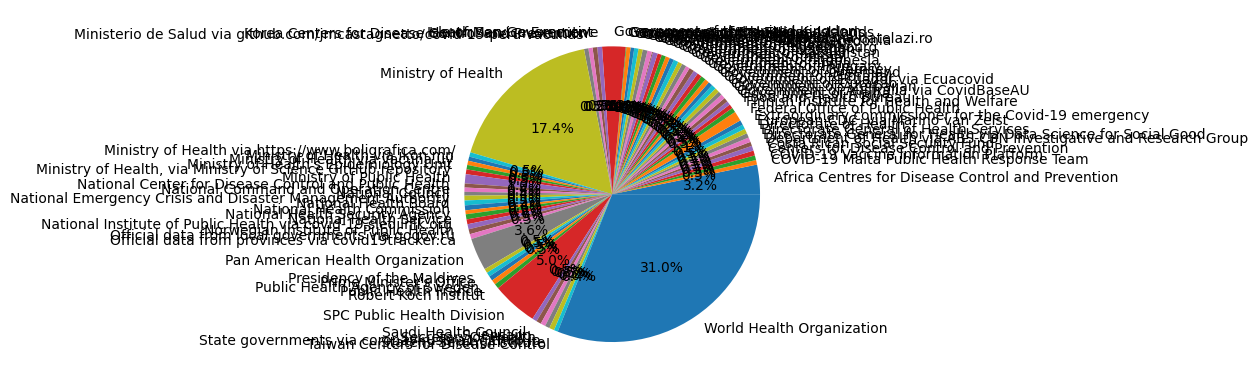

In [ ]:
fig, ax = plt.subplots()
ax.pie(source_per_ins['vaccines'], labels = source_per_ins["source_name"], autopct='%1.1f%%')
plt.show()

<Axes: ylabel='vaccines'>

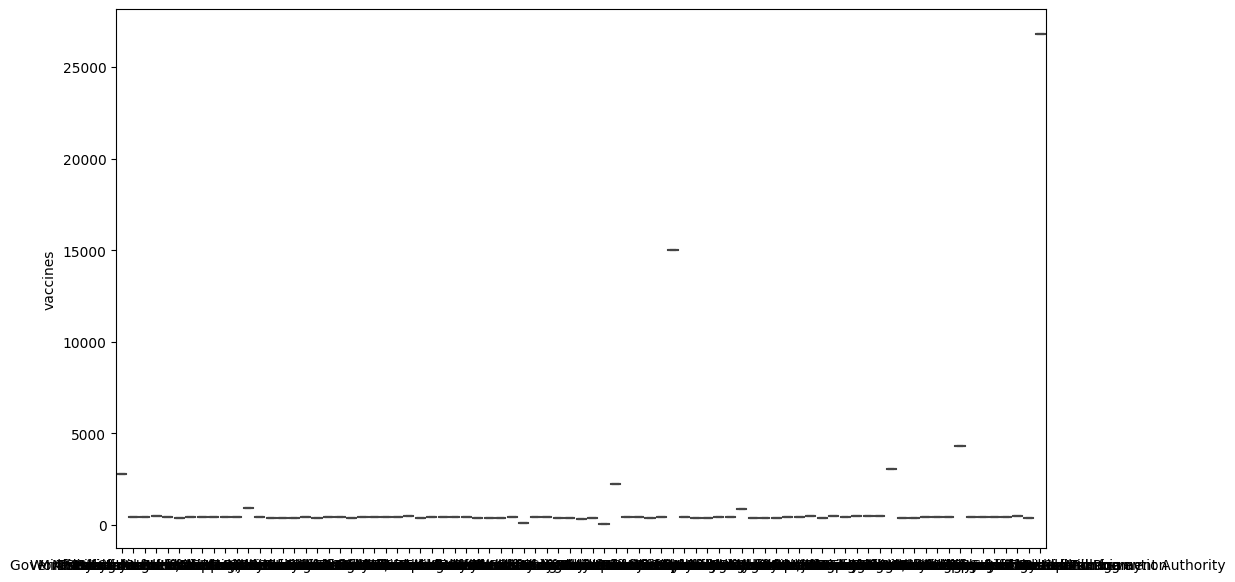

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x = country_vac_df["source_name"].unique() ,
            y = source_per_ins['vaccines'],
            data = country_vac_df)

**Create a stacked area chart to visualize the composition of different variables over time**

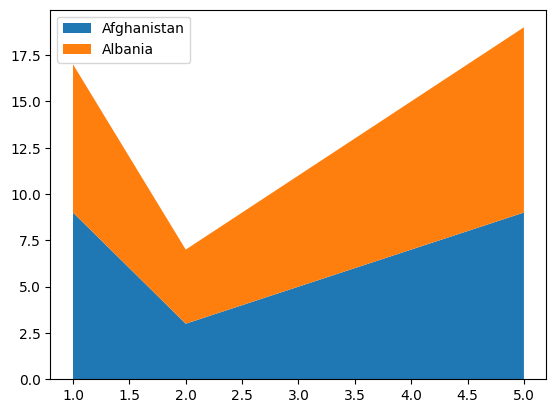

In [ ]:
fig, ax = plt.subplots()
l = country_vac_df['country'].unique()
x = [1, 2, 3, 4, 5]
y2 = [9, 3, 5, 7, 9]
y3 = [8, 4, 6, 8, 10]
ax.stackplot(x ,y2, y3, labels=l)
plt.legend(loc='upper left')
plt.show()

In [ ]:
temp = country_vac_df.groupby(["country", "source_name"])["source_name"].count()
temp

country                          source_name                                                  
Afghanistan                      World Health Organization                                        394
Albania                          Ministry of Health                                               439
Algeria                          World Health Organization                                        405
Andorra                          World Health Organization                                        413
Angola                           World Health Organization                                        390
Anguilla                         World Health Organization                                        415
Antigua and Barbuda              Ministry of Health                                               392
Argentina                        Ministry of Health                                               456
Armenia                          World Health Organization                               


**Develop a heat map to display the correlation matrix of the numerical variables.**




In [ ]:
corelation_matrix = country_vac_df.corr()

<ipython-input-27-d85ec4680151>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelation_matrix = country_vac_df.corr()


<Axes: >

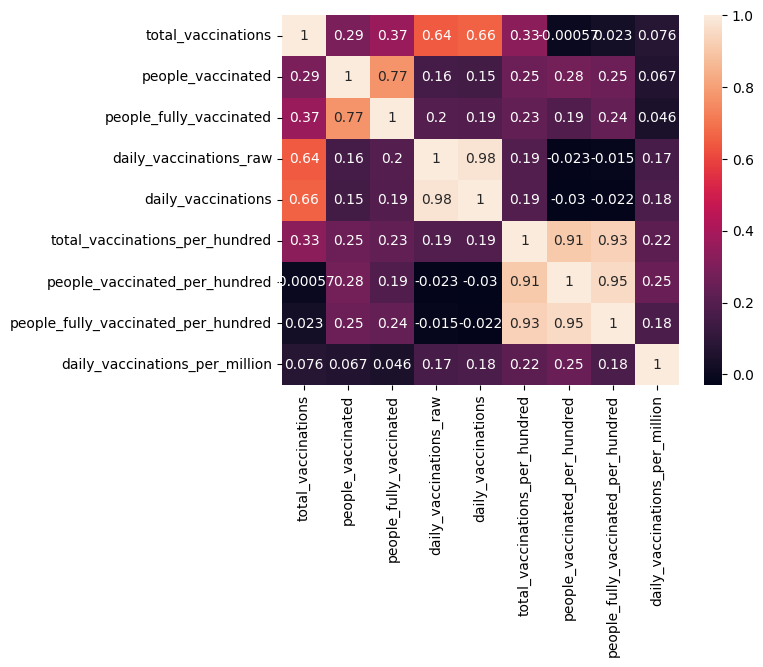

In [ ]:
# created heat map for corelations
sns.heatmap(corelation_matrix,annot=True)

**Combine multiple visualizations into a dashboard-like layout using Matplotlib's subplots**

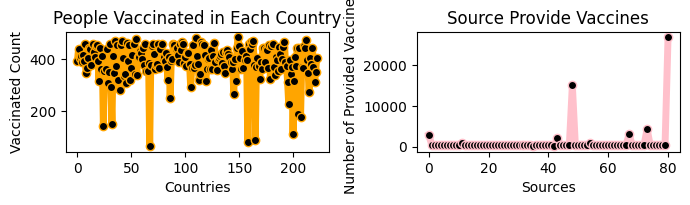

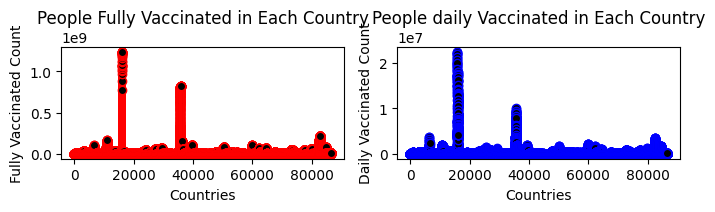

In [88]:
from matplotlib.backends.backend_pdf import PdfPages

plt.subplot(2,2,1)
fig.suptitle('Vertically stacked subplots')
# Line chart folder size visualization
fig1 = plt.plot(country_count_df['people_vaccinated'], linewidth = '5', mfc = 'black', marker = 'o', color = 'orange')
plt.title("People Vaccinated in Each Country")
plt.xlabel("Countries")
plt.ylabel("Vaccinated Count")

plt.subplot(2,2,2)
from matplotlib.markers import MarkerStyle
# Line chart folder size visualization
fig2 = plt.plot(source_per_ins['vaccines'], linewidth = '5', mfc = 'black', marker = 'o', color = 'pink')
plt.title("Source Provide Vaccines")
plt.xlabel("Sources")
plt.ylabel("Number of Provided Vaccines")
plt.show()



plt.subplot(2,2,3)
fig3 = plt.plot(country_vac_df['people_fully_vaccinated'], linewidth = '5', mfc = 'black', marker = 'o', color = 'red')
plt.title("People Fully Vaccinated in Each Country")
plt.xlabel("Countries")
plt.ylabel("Fully Vaccinated Count")

plt.subplot(2,2,4)
fig.suptitle('Vertically stacked subplots')
# Line chart folder size visualization
fig4 = plt.plot(country_vac_df['daily_vaccinations'], linewidth = '5', mfc = 'black', marker = 'o', color = 'blue')
plt.title("People daily Vaccinated in Each Country")
plt.xlabel("Countries")
plt.ylabel("Daily Vaccinated Count")

# call the function
plt.savefig("Summary2_covid_19.pdf")

**Save the final visualization dashboard as a PDF document**